<a href="https://colab.research.google.com/github/RaghulJ06/DSAI/blob/main/ARIMA_SARIMA_Forecast_Yahoo_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA-SARIMA Forecast

- Yahoo Stock

### Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and prepare the dataset

In [ ]:
data = pd.read_csv('yahoo_stock.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
stock_data = data['Close']

In [ ]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


### Step 3: Split the data into training and testing sets

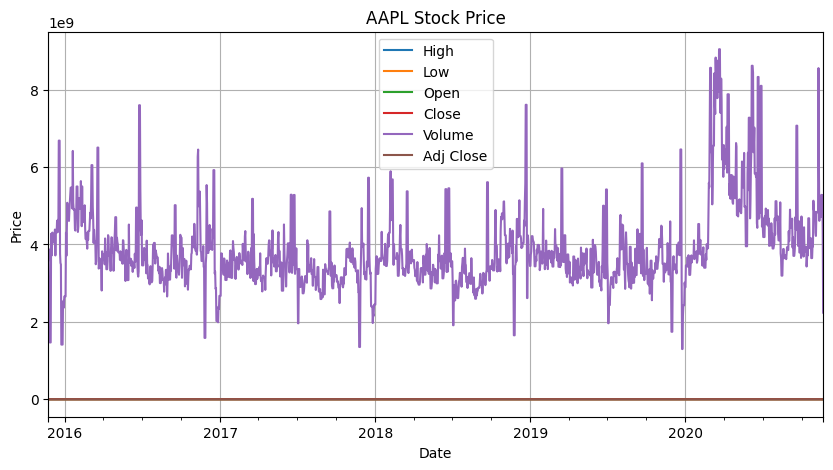

In [ ]:
# Plot the data
data.plot(title='AAPL Stock Price', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

### Step 4: Train the ARIMA model

In [ ]:
p, d, q = 1, 1, 1
model_arima = ARIMA(train, order=(p, d, q))
results_arima = model_arima.fit()

### Step 5: Forecast using the ARIMA model

In [ ]:
forecast_arima = results_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

### Step 6: Train the SARIMA model

In [ ]:
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results_sarima = model_sarima.fit()

### Step 7: Forecast using the SARIMA model

In [ ]:
forecast_sarima = results_sarima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

### Step 8: Plot the ARIMA and SARIMA forecasts

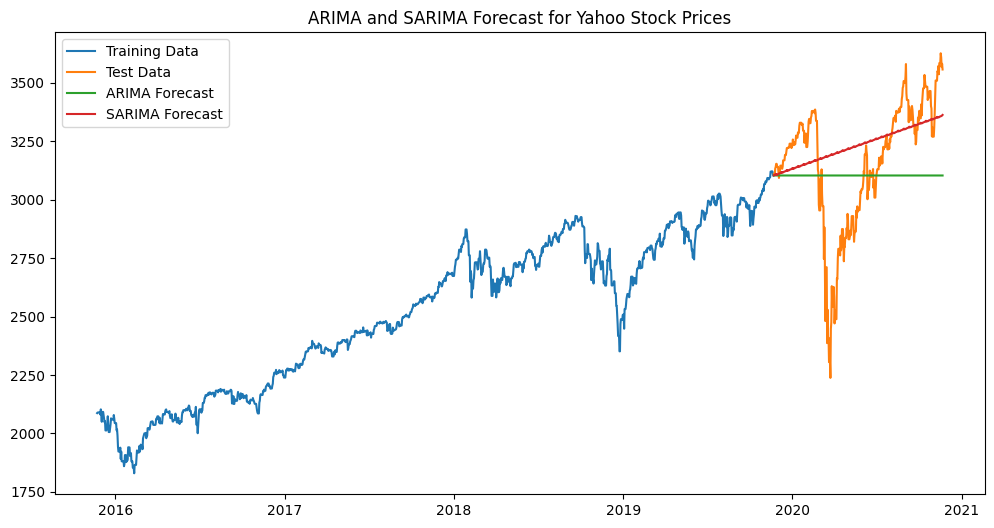

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('ARIMA and SARIMA Forecast for Yahoo Stock Prices')
plt.legend()
plt.show()